# Machine Learning (laboratory instruction)
## Linear regression (part 5)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 5).ipynb
+-- 🖼 houses.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Implementation of multivariate linear regression for house price prediction.

### Dataset
Read the data from `houses.npz` file. This is a multivariate data with information about the house (flats) prices. The columns in $x$ contain following information, respectively:
* the area,
* distance to city centre,
* standard,
* distance to highway.

The $y$ contains the price of the flat.

**Tip**: You can use below code to read the data:

```python
with open('houses.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
```

### Task. Implement the multivariate linear regression.
Implement linear regression function $f$ that takes variable number of parameters. This is simply a weighted sum of input features, plus a constant (the bias).

$$
\begin{equation*}
f_\theta(x) = \theta_0x_0 + \theta_1x_1 + \cdots + \theta_{n-1}x_{n-1} + \theta_{n}x_n
\label{eq:fun} \tag{1}
\end{equation*}
$$

, where $\theta$ are the model parameters (parameter vector), $x$ are the features (feature vector), $n$ is the number of features. Note that $\theta_0x_0$ (depending on the implementation) represents the bias where the $x_0$ always equals 1 and $\theta_0$ is the actual bias.

To add a column with only ones you can use `hstack` function: `np.hstack((np.ones(len(x)).reshape(-1, 1), x))`.

In this case you will have to calculate the partial derivatives for all the parameters. The vector which contains all the partial derivatives is called gradient:

$$
\begin{equation*}
\nabla = \bigg{\lgroup}\frac{\partial}{\partial \theta_0 MSE(\theta)}, \frac{\partial}{\partial \theta_1 MSE(\theta)}, \cdots, \frac{\partial}{\partial \theta_n MSE(\theta)}\bigg{\rgroup}
\label{eq:gradient} \tag{2}
\end{equation*}
$$

The next step can then be calculated by following formula:

$$
\begin{equation*}
\theta' = \theta - \alpha\nabla_\theta MSE(\theta)
\label{eq:nextstep} \tag{3}
\end{equation*}
$$

It can be even written as simplified formula:

$$
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
\label{eq:nextstepsimple} \tag{4}
\end{equation*}
$$

, where $j$ is the number of features, $\alpha$ is the learning rate, and $m$ is the number of samples.


#### Vectorized form.

It is likely that the implementation of above will work very slowly if implemented iteratively. Implement the solution using vectorized form. In this case the equation $\eqref{eq:fun}$ can be done by vector multiplication:

$$
\begin{equation*}
f_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x
\label{eq:funvec} \tag{5}
\end{equation*}
$$

Thus, the cost function is:

$$
\begin{equation*}
MSE = \frac{1}{m}\sum(\theta^Tx^{(i)} - y^{(i)})^2
\label{eq:costvec} \tag{6}
\end{equation*}
$$

And the partial derivatives can be calculated as follows:

$$
\begin{equation*}
\frac{\partial}{\partial\theta_j}MSE = \frac{2}{m}\sum(\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}
\label{eq:dervec} \tag{7}
\end{equation*}
$$

Now, we can define the gradient:

$$
\begin{equation*}
\nabla = \frac{2}{m}x^T(x\theta - y)
\label{eq:gradientvec} \tag{8}
\end{equation*}
$$

Remark: There is possibility that your calculation may differ if you use different shapes of the vectors.



final error: 5807317133.586093
final weights: [ 202.58360254 5831.08728592  -12.13020033 1346.83397777   36.50396075]


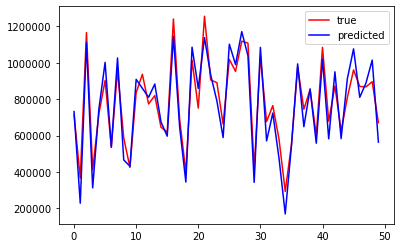

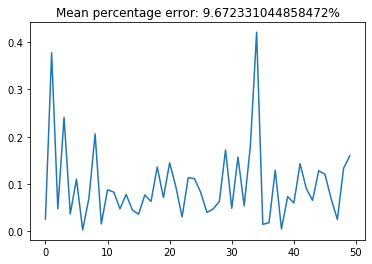

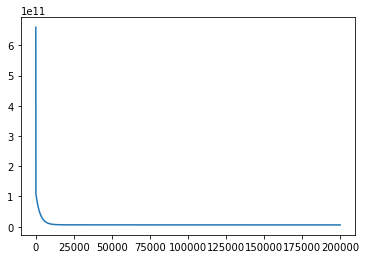

In [7]:
# >>> WRITE YOUR CODE BELOW <<<
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
with open('houses.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
@njit
def mse(predictions, targets):
    return np.square(np.subtract(predictions, targets)).mean()
@njit
def grad(x, predictions, targets):
    return (2 / targets.shape[0]) * (x.T @ np.subtract(predictions, targets))

x = np.hstack((np.ones(len(x)).reshape(-1, 1), x))
w = np.random.uniform(size=(5,))
lr = 3e-8
epochs = 200000
history = []

for i in range(epochs):
    predictions = x @ w.T
    error = mse(predictions, y)
    w -= lr * grad(x, predictions, y)
    history.append(error)

print(f'final error: {history[-1]}')
print(f'final weights: {w}')
plt.plot(np.arange(len(y)), y, color = 'red', label='true')
plt.plot(np.arange(len(predictions)), predictions, color ='blue', label='predicted')
plt.legend()
plt.show()
plt.plot(abs(np.divide((y - predictions), y)))
plt.title(f'Mean percentage error: {abs(np.divide((y - predictions), y)).mean() * 100}%')
plt.show()
plt.plot(history)
plt.show()

In [11]:
import pandas as pd
print(pd.DataFrame({'y':[f'{int(v):8d}' for v in y], 'y\'': [f'{int(v):8d}' for v in predictions]}).to_markdown())

|    |        y |       y' |
|---:|---------:|---------:|
|  0 |   714000 |   732149 |
|  1 |   367000 |   228354 |
|  2 |  1166000 |  1110877 |
|  3 |   412000 |   312707 |
|  4 |   720000 |   746175 |
|  5 |   903000 |  1002336 |
|  6 |   537000 |   535718 |
|  7 |   960000 |  1026689 |
|  8 |   587000 |   466179 |
|  9 |   425000 |   431405 |
| 10 |   836000 |   909030 |
| 11 |   937000 |   859734 |
| 12 |   774000 |   810549 |
| 13 |   820000 |   883581 |
| 14 |   646000 |   674802 |
| 15 |   619000 |   596940 |
| 16 |  1241000 |  1145958 |
| 17 |   690000 |   646791 |
| 18 |   399000 |   344839 |
| 19 |  1014000 |  1085928 |
| 20 |   751000 |   859563 |
| 21 |  1256000 |  1138380 |
| 22 |   906000 |   933097 |
| 23 |   891000 |   790159 |
| 24 |   663000 |   589367 |
| 25 |  1019000 |  1102495 |
| 26 |   953000 |   990522 |
| 27 |  1119000 |  1171309 |
| 28 |  1108000 |  1038681 |
| 29 |   414000 |   342878 |
| 30 |  1035000 |  1084896 |
| 31 |   677000 |   570841 |
| 32 |   76500

In [10]:
!pip install tabulate

You should consider upgrading via the 'c:\users\mikolaj\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
